# 0. Setup Paths

In [1]:
import os

In [2]:
CUSTOM_MODEL_NAME = 'pedestrian_detection' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'
LATEST_MODEL_NAME = 'pedestrian_v1'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc'),
    'LATEST_MODEL_PATH': os.path.join('Tensorflow', 'workspace', 'pre-trained-models')
 }

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [15]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [ ]:
# https://www.tensorflow.org/install/source_windows

In [ ]:
!pip install --user tensorflow-gpu

In [ ]:
if os.name=='nt':
    !pip install wget
    import wget

In [ ]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [ ]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

In [ ]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

In [ ]:
os.chmod(r"C:\Users\liyij\AppData\Local\Temp\easy_install-to_akisp\pycocotools-2.0.2\.eggs\Cython-0.29.24-py3.8-win-amd64.egg\Cython\Compiler\FlowControl.cp38-win_amd64.pyd", 0o777)
!pip install tensorflow --upgrade

In [ ]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2

In [5]:
import object_detection

In [ ]:
!pip list

In [ ]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

# 2. Create Label Map

In [17]:
labels = [{'name':'pedestrian', 'id':1}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [ ]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [8]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [20]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


# 4. Copy Model Config to Training Folder

In [22]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


# 5. Update Config For Transfer Learning

In [5]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [34]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [35]:
config

{'model': ssd {
   num_classes: 1
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   match

In [27]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [29]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [30]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [36]:
os.chmod(r"C:\Users\liyij\anaconda3\envs\tf2.5\Lib\site-packages\~ensorflow\lite\experimental\microfrontend\python\ops\_audio_microfrontend_op.so", 0o777)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\liyij\\anaconda3\\envs\\tf2.5\\Lib\\site-packages\\~ensorflow\\lite\\experimental\\microfrontend\\python\\ops\\_audio_microfrontend_op.so'

In [6]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [38]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=10000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [39]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\pedestrian_detection --pipeline_config_path=Tensorflow\workspace\models\pedestrian_detection\pipeline.config --num_train_steps=10000


In [ ]:
!{command}

# 7. Evaluate the Model

In [40]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [ ]:
os.chmod(r"C:\Users\liyij\anaconda3\envs\tf2.5\Lib\site-packages\numpy\~libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll", 0o777)

In [41]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\pedestrian_detection --pipeline_config_path=Tensorflow\workspace\models\pedestrian_detection\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\pedestrian_detection


In [ ]:
!{command}

# 8. Load Train Model From Checkpoint

In [6]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [7]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-11')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [8]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import figure as fig
%matplotlib inline

In [9]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])
print(category_index)

{1: {'id': 1, 'name': 'pedestrian'}}


In [10]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'pedestrian.62da9174-f377-11eb-b96f-34cff6b8e259.jpg')

(100, 4)
[{'box': array([0.29906636, 0.52652466, 0.52346474, 0.6086148 ], dtype=float32), 'class_name': 'pedestrian', 'score': 0.99958843}, {'box': array([0.34293512, 0.01888063, 0.5398913 , 0.08264291], dtype=float32), 'class_name': 'pedestrian', 'score': 0.98306215}, {'box': array([0.27201322, 0.83827484, 0.52521133, 0.90883505], dtype=float32), 'class_name': 'pedestrian', 'score': 0.9808967}]
(192, 262, 3)


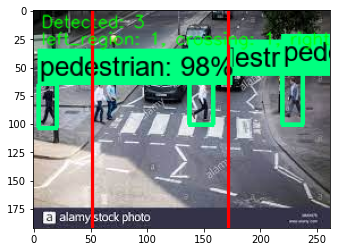

In [37]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

boxes = detections['detection_boxes']
print(boxes.shape)
# get all boxes from an array
max_boxes_to_draw = boxes.shape[0]
# get scores to get a threshold
scores = detections['detection_scores']
# this is set as a default but feel free to adjust it to your needs
min_score_thresh=.6
# # iterate over all objects found
coordinates = []
for i in range(min(max_boxes_to_draw, boxes.shape[0])):
    if scores[i] > min_score_thresh:
        class_id = int(detections['detection_classes'][i] + 1)
        coordinates.append({
            "box": boxes[i],
            "class_name": category_index[class_id]["name"],
            "score": scores[i]
        })

print(coordinates)

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=10,
            min_score_thresh=min_score_thresh,
            agnostic_mode=False)
            
cv2.putText(img=image_np_with_detections, text=f'Detected: {len(coordinates)}', org=(7, 15), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.5, color=(0, 255, 0), thickness=1, lineType=cv2.LINE_AA)

print(image_np_with_detections.shape)
#horizontal_cumulative_counting(image_np_with_detections, detected_objects=coordinates, roi_x=0.6, direction='both', deviation=0.05)
image_np_with_detections = region_detection(image_np_with_detections, detected_objects=coordinates, left_ROI=0.2, right_ROI=0.66)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

# 10. Real Time Detections from your Webcam

In [ ]:
!pip uninstall opencv-python-headless -y

In [11]:
# region detection
def region_detection(frame, detected_objects, left_ROI, right_ROI):
    left_ROI_count = 0
    right_ROI_count = 0
    crossing_count = 0

    # added the centers(x, y) of all detected boxes to a list
    x_centers = []
    y_centers = []
    for i in range(len(detected_objects)):
        # bounding box is in the format of [y_up, x_left, y_down, x_right]
        coordinate = detected_objects[i]['box']
        x_centers.append((coordinate[3] + coordinate[1]) / 2)
        y_centers.append((coordinate[2] + coordinate[0]) / 2)

    for x_center in x_centers:
        if 0 <= x_center <= left_ROI:
            left_ROI_count += 1
        elif 1 >= x_center >= right_ROI:
            right_ROI_count += 1
        else:
            crossing_count += 1 
    
    # draw ROI line, red for regular, green if object is detected
    left = int(frame.shape[1] * left_ROI)
    right = int(frame.shape[1] * right_ROI)
    width = frame.shape[0]
    
    cv2.line(frame, (left, 0), (left, width), (0, 0, 255), 2)
    cv2.line(frame, (right, 0), (right, width), (0, 0, 255), 2)
    output_count_text = f'left_region: {left_ROI_count}, crossing: {crossing_count}, right_region: {right_ROI_count}'
    cv2.putText(frame, output_count_text, (7, 30), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.5, color=(0, 255, 0), thickness=1, lineType=cv2.LINE_AA)

    return frame

    


In [12]:
left_right = {}
right_left = {}
cumulative_counting = {'total': 0}

isDetected = {}

# resets variables
def reset_counting_variables():
    global left_right, right_left, cumulative_counting, isDetected
    left_right = {}
    right_left = {}
    cumulative_counting = {'total': 0}
    isDetected = {}
    

# cumulative object counting mode along y-axis
def horizontal_cumulative_counting(frame, detected_objects, roi_x=.5, direction='both', deviation=0.01):

    # added the x_centers(x, y) of all detected boxes to a list
    x_centers = []
    for i in range(len(detected_objects)):
        # bounding box is in the format of [y_up, x_left, y_down, x_right]
        coordinate = detected_objects[i]['box']
        x_centers.append((coordinate[3] + coordinate[1]) / 2)
        
    # detect if x_center of object crosses ROI
    insideROI = False # any object is inside ROI
    if direction == 'right_2_left':
        for i, x_center in enumerate(x_centers):
            # get y_center of current object, y_center should not change a lot when crossing ROI
            coordinate = detected_objects[i]['box']
            y_center = (coordinate[2] + coordinate[0]) / 2
            y_center = int(y_center * 10)

            # object withn 1-2 deviations right to ROI, register the object for potential crossing
            if roi_x + deviation < x_center < roi_x + 2 * deviation:
                # is the object registered, register if not
                if y_center not in right_left.keys():
                    right_left.update({y_center: {'x_pos': x_center, 'status': 'pre-crossing'}})
                else:
                    if(x_center <= right_left.get(y_center)['x_pos']): # object moves further left but hasn't crossed ROI line
                        right_left.update({y_center: {'x_pos': x_center, 'status': 'pre-crossing'}})
                    else: # object moves right, remove it from potential crossing list
                        right_left.pop(y_center)
            elif roi_x - deviation < x_center < roi_x + deviation: # object inside ROI, object must be registered
                if y_center in right_left.keys():
                    if right_left.get(y_center)['status'] == 'pre-crossing':
                        right_left.update({y_center: {'x_pos': x_center, 'status': 'crossing'}})
                    
                insideROI = True
            elif roi_x - 2 * deviation < x_center < roi_x - deviation: # object right to ROI, complete crossing
                if y_center in right_left.keys(): # object is already registered
                    if right_left.get(y_center)['status'] == 'crossing':
                        # remove object
                        right_left.pop(y_center)

                        # update for all objects
                        cumulative_counting.update({'total': cumulative_counting.get('total') + 1})

                        # update for each object
                        class_name = detected_objects[i]['class_name']
                        if class_name not in cumulative_counting.keys():
                            cumulative_counting.update({class_name: 1})
                        else:
                            cumulative_counting.update({class_name: cumulative_counting.get(class_name) + 1})   
      
    elif direction == 'left_2_right':
        pass
    elif direction == 'both':
        global isDetected
        for i, x_center in enumerate(x_centers):
            # get y_center of current object, y_center should not change a lot when crossing ROI
            coordinate = detected_objects[i]['box']
            y_center = (coordinate[2] + coordinate[0]) / 2
            y_center = int(y_center * 10)

            if roi_x - deviation < x_center < roi_x + deviation:
                # object detected
                insideROI = True

                # check for previous ROI state
                if y_center not in isDetected.keys():
                    # register object
                    isDetected.update({y_center: {'x_pos': x_center, 'status': 'insideROI'}})

                    # update for total count
                    cumulative_counting.update({'total': cumulative_counting.get('total') + 1})

                    # update for specific label
                    class_name = detected_objects[i]['class_name']
                    if class_name not in cumulative_counting.keys():
                        cumulative_counting.update({class_name: 1})
                    else:
                        cumulative_counting.update({class_name: cumulative_counting.get(class_name) + 1})
                else:
                    #update 'x_pos' to minimize frame-by-frame y_center difference
                    isDetected.update({y_center: {'x_pos': x_center, 'status': 'stillInsideROI'}})

            elif roi_x - 2 * deviation < x_center < roi_x - deviation or roi_x + deviation < x_center < 2 * deviation:
                # deregister object if it leaves ROI
                if y_center in isDetected.keys():
                    isDetected.pop(y_center)
            

    # draw ROI line, red for regular, green if object is detected
    x_ROI = int(frame.shape[1] * roi_x)
    width = frame.shape[0]
    
    cv2.line(frame, (x_ROI, 0), (x_ROI, width), (0, 0, 255) if insideROI is False else (0, 255, 0), 2)
    cv2.putText(frame, str(cumulative_counting), (7, 30), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.5, color=(0, 255, 0), thickness=1, lineType=cv2.LINE_AA)

    return frame

In [37]:
# actual detection
VIDEO_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'walking.avi')

cap = cv2.VideoCapture(VIDEO_PATH)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

#save detection video
size = (width, height)
result = cv2.VideoWriter('demo.avi', cv2.VideoWriter_fourcc(*'MJPG'), 10, size)

reset_counting_variables()

while cap.isOpened(): 
    ret, frame = cap.read()

    # EOF
    if not ret:
        cap.release()
        cv2.destroyAllWindows()
        break

    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    # region_detection_overlay
    line1 = np.array([[0, 240], [155,260], [256, 282], [300, 295], [500, 380],[768, 500], [768, 576], [0, 576]])
    line2 = np.array([[0, 190], [200, 210], [280, 215], [330, 213], [400, 208], [500, 190], [600, 155], [668, 120], [768, 70], [768, 0], [0, 0]])
    line3 = np.array([[768, 145], [690, 200], [687, 213], [690, 220], [730, 265], [768, 295]])
    image_np_with_detections = region_detection_overlay(image_np_with_detections, [line1, line2, line3], 0.4)
    
    # this is set as a default
    min_score_thresh=.5

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=10,
                min_score_thresh=min_score_thresh,
                agnostic_mode=False)
    
    boxes = detections['detection_boxes']
    # get all boxes from an array
    max_boxes_to_draw = boxes.shape[0]
    # get scores to get a threshold
    scores = detections['detection_scores']
    # # iterate over all objects found
    coordinates = []
    for i in range(min(max_boxes_to_draw, boxes.shape[0])):
        if scores[i] > min_score_thresh:
            class_id = int(detections['detection_classes'][i] + 1)
            coordinates.append({
                "box": boxes[i],
                "class_name": category_index[class_id]["name"],
                "score": scores[i]
            })
    
    #image_np_with_detections = horizontal_cumulative_counting(image_np_with_detections, detected_objects=coordinates, roi_x=0.7, direction='right_2_left', deviation=0.02)
    #image_np_with_detections = region_detection(image_np_with_detections, detected_objects=coordinates, left_ROI=0.3, right_ROI=0.5)


    # put total counting result text on frame
    cv2.putText(img=image_np_with_detections, text=f'Total Pedestrian Count: {len(coordinates)}', org=(0, 25), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.7, color=(255, 255, 255), thickness=2, lineType=cv2.LINE_AA)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    result.write(image_np_with_detections)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

In [15]:
# test code to check if point is inside polygon
from shapely.geometry import Point, Polygon

# create point objects
p1 = Point(100, 300)

# create a polygon
coords = [(0, 240), (155,260), (256, 282), (300, 295), (500, 380),(768, 500), (768, 576), (0, 576)]
poly = Polygon(coords)

p1.within(poly)

True

In [22]:
from shapely.geometry import Point, Polygon

# lines should be a list of np.arrays
def region_detection_overlay(frame, lines, alpha):
    # create two copies of the original imageq2 -- one for
    # the overlay and one for the final output image
    overlay = frame.copy()
    output = frame.copy()

    red = (0, 0, 255)
    green = (0, 255, 0)
    blue = (255, 0, 0)
    color = [red, green, blue]

    for i, line in enumerate(lines):
        overlay = cv2.fillPoly(overlay, np.int32([line]), color=color[i % len(color)])

    #apply the overlay
    cv2.addWeighted(overlay, alpha, output, 1-alpha, 0, output)

    output = np.array(output)

    return output



In [26]:
VIDEO_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'walking.avi')

cap = cv2.VideoCapture(VIDEO_PATH)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

line1 = np.array([[0, 240], [155,260], [256, 282], [300, 295], [500, 380],[768, 500], [768, 576], [0, 576]])
line2 = np.array([[0, 190], [200, 210], [280, 215], [330, 213], [400, 208], [500, 190], [600, 155], [668, 120], [768, 70], [768, 0], [0, 0]])
line3 = np.array([[768, 145], [690, 200], [687, 213], [690, 220], [730, 265], [768, 295]])

# frame.shape = (576, 768, 3)
while cap.isOpened(): 
    ret, frame = cap.read()

    # EOF
    if not ret:
        cap.release()
        cv2.destroyAllWindows()
        break

    output = region_detection_overlay(frame, [line1, line2, line3], 0.4)

    
    image_np = np.array(output)
    
    cv2.imshow('test', image_np)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break
    

# 10. Freezing the Graph

In [ ]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [ ]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

In [ ]:
## use export_inference_graph.py to export frozen graph for object counting api
OBJECT_COUNTING_FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_inference_graph.py ')
cmd = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_prefix={} --output_directory={}".format(OBJECT_COUNTING_FREEZE_SCRIPT, files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])
print(cmd)

In [ ]:
!{cmd} 

# 11. Conversion to TFJS

In [ ]:
!pip install tensorflowjs

In [ ]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

In [ ]:
# Test Code: https://github.com/nicknochnack/RealTimeSignLanguageDetectionwithTFJS

# 12. Conversion to TFLite

In [ ]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [ ]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [ ]:
print(command)

In [ ]:
!{command}

In [ ]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [ ]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [ ]:
print(command)

In [ ]:
!{command}

# 13. Zip and Export Models 

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')